<a href="https://colab.research.google.com/github/shaina-12/Artificial-Intelligence/blob/main/Deep%20Learning/Logistic_Regression_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import scipy

In [2]:
training_data = datasets.MNIST('./data',download=True,train=True)
test_data = datasets.MNIST('data',download=True,train=False)

In [3]:
len(training_data)

60000

In [4]:
len(test_data)

10000

In [5]:
print(training_data[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x7F33FA189750>, 5)


Text(0.5, 1.0, 'Label of Image:0')

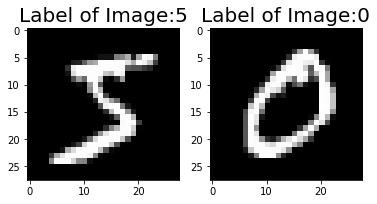

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(1,2,1)
image, label = training_data[0]
plt.imshow(image, cmap='gray')
plt.title("Label of Image:{}".format(label),fontsize=20)
plt.subplot(1,2,2)
image, label = training_data[1]
plt.imshow(image, cmap='gray')
plt.title("Label of Image:{}".format(label),fontsize=20)

In [7]:
training_data = datasets.MNIST('data',train=True,transform=ToTensor())
test_data = datasets.MNIST('data',train=False,transform=ToTensor()) 

In [8]:
batch_size= 100
train_dl = DataLoader(training_data,batch_size=batch_size)
test_dl = DataLoader(test_data,batch_size=batch_size)

In [9]:
for X, y in test_dl:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([100, 1, 28, 28])
Shape of y: torch.Size([100]) torch.int64


In [10]:
input_size = 28*28  #Size of image
num_classes = 10  #the image number are in range 0-10
class LogisticRegression(nn.Module):
  def __init__(self,input_size,num_classes):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(input_size,num_classes)
  def forward(self,x):
    output = self.linear(x)
    return output

In [12]:
model = LogisticRegression(input_size,num_classes)
epochs = 10
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimize = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
run = 0
accuracy_score = 0
for epoch in range(epochs):
  for i, (images,labels) in enumerate(train_dl):
    #labels = labels.unsqueeze(1)
    images = torch.autograd.Variable(images.view(-1,input_size))
    labels = torch.autograd.Variable(labels)
    # nullify gradients w.r.t. parameters
    optimize.zero_grad()
    #forward propagation
    output = model(images)
    # compute loss based on obtained value and actual label
    #print(output.shape)
    #print(labels.shape)
    compute_loss = loss_fn(output,labels)
    # backward propagation
    compute_loss.backward()
    # update the parameters
    optimize.step()
    run+=1
    if ((i+1)%200 == 0):
      # check total accuracy of predicted value and actual label
      accurate = 0
      total = 0
      for images,labels in test_dl:
        images = torch.autograd.Variable(images.view(-1,input_size))
        output = model(images)
        _,predicted = torch.max(output.data, 1)
        # total labels
        total+= labels.size(0)
        # Total correct predictions
        accurate+= (predicted == labels).sum()
        accuracy_score = 100 * accurate/total
        print('Iteration: {}. Loss: {}. Accuracy: {}'.format(run, compute_loss.item(), accuracy_score))
print('Final Accuracy:',accuracy_score)

Iteration: 200. Loss: 2.0933189392089844. Accuracy: 39.0
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 39.5
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 36.66666793823242
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 37.5
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 38.20000076293945
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 38.33333206176758
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 38.0
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 39.25
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 39.11111068725586
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 39.099998474121094
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 38.727272033691406
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 38.58333206176758
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 38.46154022216797
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 38.35714340209961
Iteration: 200. Loss: 2.0933189392089844. Accuracy: 38.33333206176758
Iteration: 2